---   
 <img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Tools and Techniques for Data Science</h1>
<h1 align="center">Course: Deep Learning</h1>

---
<h1 align="right">Muhammad Sheraz (Data Scientist)</h1>
<h1 align="center">Day 11 (Customer Churn Prediction using ANN)</h1>


<BR>
<DIV align="center">
<img  width="60%" src="../Images/ccm.png"  >
</DIV>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
X=df.drop(columns='Exited')
y=df['Exited'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.transform(X_test)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model=Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
#model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144 (576.00 Byte)
Trainable params: 144 (576.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history=model.fit(X_train,y_train,batch_size=250,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10


26/26 [==============================] - 2s 26ms/step - loss: 0.5302 - accuracy: 0.7948 - val_loss: 0.5290 - val_accuracy: 0.7962
Epoch 2/10
26/26 [==============================] - 0s 6ms/step - loss: 0.5209 - accuracy: 0.7948 - val_loss: 0.5223 - val_accuracy: 0.7962
Epoch 3/10
26/26 [==============================] - 0s 6ms/step - loss: 0.5158 - accuracy: 0.7948 - val_loss: 0.5180 - val_accuracy: 0.7962
Epoch 4/10
26/26 [==============================] - 0s 7ms/step - loss: 0.5128 - accuracy: 0.7948 - val_loss: 0.5139 - val_accuracy: 0.7962
Epoch 5/10
26/26 [==============================] - 0s 8ms/step - loss: 0.5100 - accuracy: 0.7948 - val_loss: 0.5108 - val_accuracy: 0.7962
Epoch 6/10
26/26 [==============================] - 0s 6ms/step - loss: 0.5077 - accuracy: 0.7948 - val_loss: 0.5092 - val_accuracy: 0.7962
Epoch 7/10
26/26 [==============================] - 0s 8ms/step - loss: 0.5061 - accuracy: 0.7948 - val_loss: 0.5070 - val_accuracy: 0.7962
Epoch 8/10
26/26 

In [19]:
model.layers[1].get_weights()

[array([[-0.6449593 ],
        [-0.5203945 ],
        [-0.1940683 ],
        [ 0.4348469 ],
        [ 0.5613036 ],
        [ 0.48895514],
        [-0.26729754],
        [-0.23101854],
        [-0.7344244 ],
        [ 0.11896784],
        [-0.15162729]], dtype=float32),
 array([-0.09599931], dtype=float32)]

In [20]:
y_log =model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [21]:
y_pred = np.where(y_log > 0.5,1,0)

In [22]:
#y_pred=y_pred.argmax(axis=-1)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.797

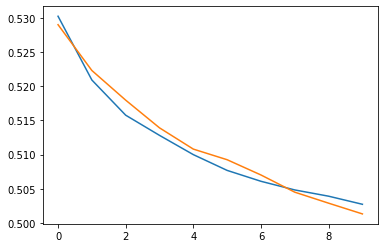

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


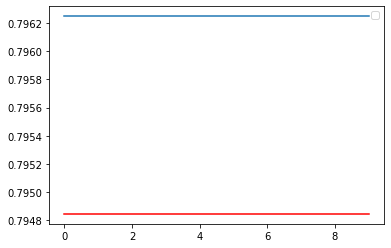

In [27]:
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'])
plt.legend();

In [28]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [183]:
#again run above code